# Matplotlib

In [1]:
import matplotlib.pyplot as plt

### Basic charts

![](https://res.cloudinary.com/codecrucks/image/upload/c_scale,w_700,h_327,dpr_2/f_webp,q_auto/v1648958444/chart-types.png?_i=AA)

### Chart selection roadmap

![](http://blog.atkcg.ru/wp-content/uploads/2015/07/1-%D0%B9-%D1%81%D0%BB%D0%B0%D0%B9%D0%B41.jpg)

Из чего состоит график:

![image.png](https://blog.logrocket.com/wp-content/uploads/2021/11/anatomy-figure.png)

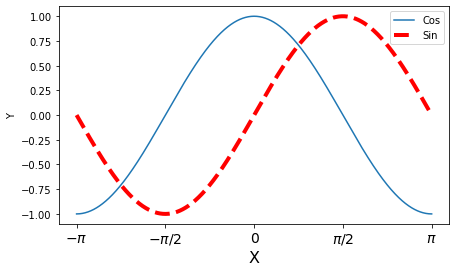

In [2]:
import numpy as np

plt.figure(figsize=(7, 4))
X = np.linspace(-np.pi, np.pi, 1000)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, label='Cos')
plt.plot(X, S, label='Sin', c='r', linestyle='--', linewidth=4)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y')
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', 0, r'$\pi/2$', r'$\pi$'], fontsize=14)
plt.legend()
plt.show()

# Homework

The data in [populations.txt](https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt('https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt')``` and do the following exercises **without for-loops**.

In [5]:
arr = np.loadtxt('https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt')
arr.shape

(21, 4)


Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

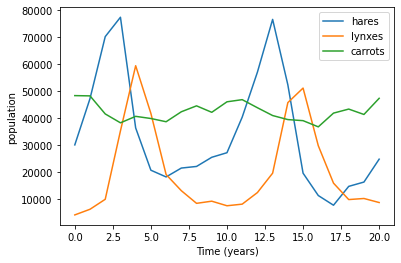

In [19]:
a = arr.transpose()
plt.plot(a[1], label='hares')
plt.plot(a[2], label='lynxes')
plt.plot(a[3], label='carrots')
plt.xlabel('Time (years)')
plt.ylabel('population')
plt.legend()
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

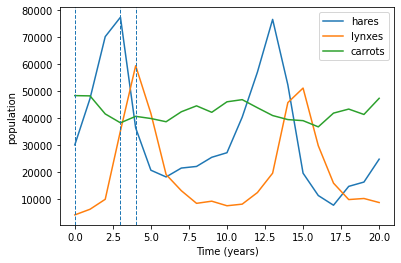

In [25]:
maxs = a.argmax(axis=1)[1:]
plt.plot(a[1], label='hares')
plt.plot(a[2], label='lynxes')
plt.plot(a[3], label='carrots')
plt.xlabel('Time (years)')
plt.ylabel('population')
plt.legend()
for m in maxs:
    plt.axvline(m, linestyle='--', linewidth=1)
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

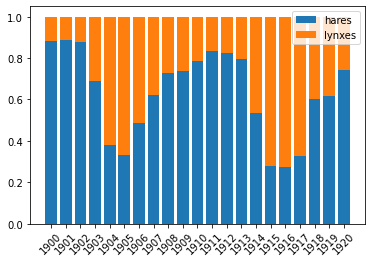

In [51]:
weight_count = {'hares': a[1] / (a[1] + a[2]), 'lynxes': a[2] / (a[1] + a[2])}
labels = a[0]
width = 0.5
botom = np.zeros(a.shape[1])
plt.bar(labels,  height=weight_count['hares'], label='hares')
plt.bar(labels,  height=weight_count['lynxes'], bottom=weight_count['hares'], label='lynxes')
plt.legend()
plt.xticks(labels, rotation=45)
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

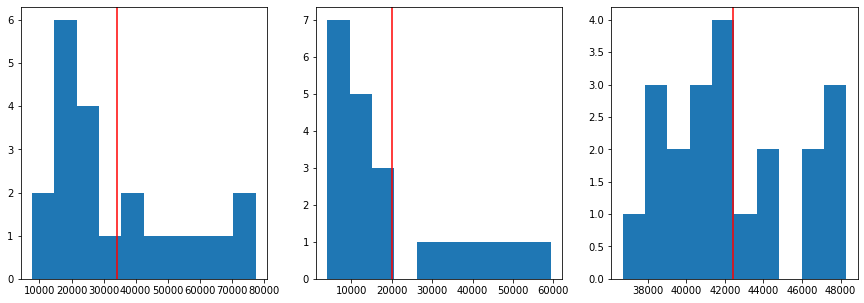

In [72]:
m = a.mean(axis=1)
s = a.std(axis=1)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].hist(a[i+1])
    ax[i].axvline(m[i+1], color=(1, 0, 0))
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


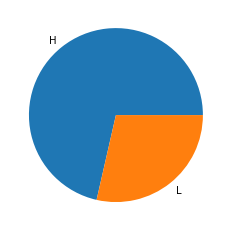

In [98]:
func = np.vectorize(lambda x: 'H' if x else 'L')
p = func(a[1] > a[2])
cnts = np.unique(p, return_counts=True)
print(p)
plt.pie(cnts[1], labels=cnts[0])
plt.show()

Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

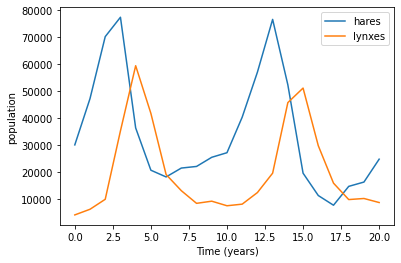

In [99]:
a = arr.transpose()
plt.plot(a[1], label='hares')
plt.plot(a[2], label='lynxes')
plt.xlabel('Time (years)')
plt.ylabel('population')
plt.legend()
plt.show()

In [101]:
np.corrcoef(a[1], a[2])[0][1]

0.07189206073535571

Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

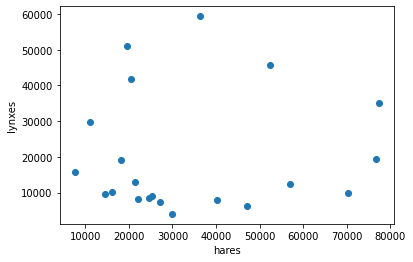

In [106]:
plt.scatter(a[1], a[2])
plt.xlabel('hares')
plt.ylabel('lynxes')
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [129]:
d = np.abs((a[2] - a[1])).mean()
if a[2][-2] > a[1][-2]:
    ans = a[2][-1] - d
else:
    ans = a[2][-1] + d
print(ans, a[1][-1])
print(abs(ans - a[1][-1]) / a[1][-1])

32361.904761904763 24700.0
0.31019857335646817


### Let's practice: k-means clustering

<img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png" width="800"/>

Входные данные в алгоритм: выборка, число кластеров, критерий остановки

Описание алгоритма:
* задаем начальное положение центров кластеров
* пока не выполнен критерий остановки:
  * распределяем точки к ближайшему центру
  * пересчитываем положения центров кластеров как центры масс образовавшихся кластеров

В качестве критерия остановки можно использовать малось изменения суммарной внутрикластерной дисперсии (суммы квадратов расстояний от каждой точки до центра ее кластера) и количество итераций.

### Датасет MNIST

Датасет MNSIT содержит примеры рукописных цифр. Загрузим датасет и посмотрим на примеры

In [265]:
from sklearn.datasets import fetch_openml

#Загрузка может занять около минуты
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

```images``` - массив картинок размера 28х28, вытянутых в вектор размера 784. Всего в датасете 70К примеров картинок

In [266]:
images.shape

(70000, 784)

```labels``` - массив, в котором записано, какая цифра нарисована на каждой картинке картинке

In [267]:
labels.shape

(70000,)

Нарисуем пример одной из картинок:

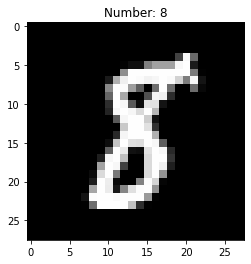

In [268]:
i = 125
plt.imshow(images[i].reshape(28, 28), cmap='Greys_r')
plt.title('Number: ' + labels[i])
plt.show()

Задание:

1) напишите функцию, реализующую алгоритм k-means.

Входом в функцию является

* массив NxM, где N -- число объектов, M -- число признаков объекта
* k -- число кластеров
* max_iter -- максимальное число итераций
* threshold -- критерий остановки (если на очередной итерации метода суммарное квадратичное отклонение изменяется меньше, чем на threshold, итерации прекращаются)

Выход:

* массив длины N, содержащий индексы кластеров от 0 до k-1
* суммарное квадратичное отклонение для полученного разбиения на кластеры

Постарайтесь обойтись минимальным количеством циклов в вашем коде.

2) Выделите 10 кластеров в датасете MNIST. Дайте интерпретацию каждому полученному кластеру (к какой цифре его можно отнести). Нарисуйте изображения, которые отвечают центрам кластеров. Посчитайте, сколько из точек кластера действительно являются той цифрой, к которой вы его отнесли (для этого сравните с массивом правильных ответов labels) и нарисуйте матрицу ошибок.

In [322]:
# Code here
from tqdm import tqdm
import random

def clf_point(p, centers):
    p = np.array(p)
    d = np.sqrt(((centers - np.array(centers.shape[0] * [p])) ** 2).sum(axis=1))
    return np.argmin(d)

def upd_centers(x, k, clfs):
    centers = []
    for i in range(k):
        mask = (clfs == k)
        if len(x[mask]) != 0:
            centers.append(x[mask].mean(axis=0))
        else:
            centers.append(x[random.randint(0, len(x))])
    return np.array(centers)

def calc_mse(x, clfs, centers):
    res = 0
    for i in range(len(centers)):
        mask = (clfs == i)
        cur = x[mask]
        s = 0
        for j in range(len(cur)):
            s += np.sqrt(((cur[j] - centers[i]) ** 2).sum())
        if len(cur) != 0:
            res += np.sqrt(s) / len(cur)
    return res  


def my_kmeans(x, k, max_iter, treshold):
    mse = -2*treshold
    new_mse = 0
    clfs = np.zeros(x.shape[0])
    mse_list = []
    for i in tqdm(range(max_iter)):
        if i == 0:
            centers = x[np.arange(0, len(images), len(images)/10).astype(int)]
        else:
            centers = upd_centers(x, k, clfs)
        for j in range(len(x)):
            clfs[j] = clf_point(x[j], centers)
        new_mse = calc_mse(x, clfs, centers)
        mse_list.append(new_mse)
        if np.abs(new_mse - mse) < treshold:
            break
        else:
            mse = new_mse
            
    return clfs, mse_list, centers

In [323]:
from sklearn.metrics import accuracy_score
clfs, mse_list, centers = my_kmeans(images, 10, 100, 0.01) 
labels = labels.astype(int)
clfs = clfs.astype(int)
print(mse_list[-1], accuracy_score(clfs, labels))

 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [07:07<00:17,  4.45s/it]

6.184920219285671 0.16105714285714287


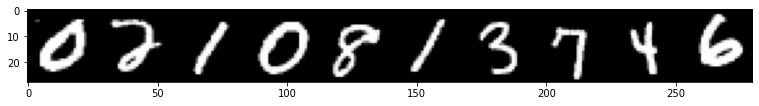

In [342]:
cs = centers.reshape(10, 28, 28)
cs = np.concatenate(cs, axis=1)
plt.figure(figsize=(13, 10))
plt.imshow(cs, cmap='Greys_r')
plt.show()

In [347]:
classes = [0, 2, 1, 0, 8, 1, 3, 7, 4, 6]
for i in range(10):
    cl = classes[i]
    mask = (clfs == cl)
    r = (labels[mask] == cl).sum() / mask.sum()
    print(f'{cl}: {r:1.3f}')

0: 0.624
2: 0.125
1: 0.000
0: 0.624
8: 0.109
1: 0.000
3: 0.007
7: 0.411
4: 0.067
6: 0.008


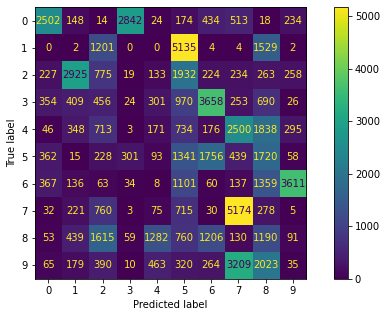

In [350]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmt = confusion_matrix(labels, clfs)

fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
ConfusionMatrixDisplay(cmt).plot(ax=ax)